# W6 Lab Assignment

Deep dive into Histogram and boxplot.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set_style('white')

%matplotlib inline 

# Histogram


Let's revisit the table from the class

| Hours | Frequency |
|-------|-----------|
| 0-1   | 4,300     |
| 1-3   | 6,900     |
| 3-5   | 4,900     |
| 5-10  | 2,000     |
| 10-24 | 2,100     |

You can draw a histogram by just providing bins and counts instead of a list of numbers. So, let's do that for convenience. 

In [40]:
bins = [0, 1, 3, 5, 10, 24]
data = {0.5: 4300, 2: 6900, 4: 4900, 7: 2000, 15: 2100} 

Draw histogram using this data. Useful query: [Google search: matplotlib histogram pre-counted](https://www.google.com/search?client=safari&rls=en&q=matplotlib+histogram+already+counted&ie=UTF-8&oe=UTF-8#q=matplotlib+histogram+pre-counted)

(array([ 4300.,  6900.,  4900.,  2000.,  2100.]),
 array([ 0,  1,  3,  5, 10, 24]),
 <a list of 5 Patch objects>)

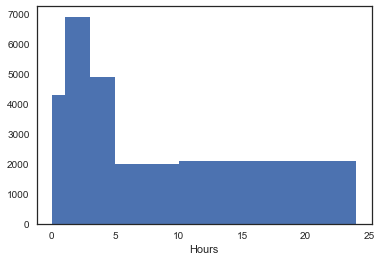

In [41]:
# TODO: draw a histogram with pre-counted data. 
plt.xlabel("Hours")
plt.hist(x = list(data.keys()), bins=bins, weights=list(data.values()))

As you can see, the **default histogram does not normalize with binwidth and simply shows the counts**! This can be very misleading if you are working with variable bin width. One simple way to fix this is using the option [`normed`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). 

(array([ 0.21287129,  0.17079208,  0.12128713,  0.01980198,  0.00742574]),
 array([ 0,  1,  3,  5, 10, 24]),
 <a list of 5 Patch objects>)

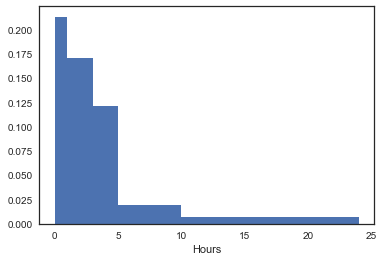

In [42]:
# TODO: fix it with normed option. 
plt.xlabel("Hours")
plt.hist(x = list(data.keys()), bins=bins, weights=list(data.values()), normed=True)

## Understanding plt.hist

How does matplotlib decide the bin width? Let's try with the IMDb data.

In [43]:
# TODO: Load IMDB data into movie_df using pandas
movie_df = pd.read_csv('imdb.csv', delimiter='\t')

Plot the histogram of movie ratings using the `plt.hist()` function.

(array([   824.,   3363.,   9505.,  21207.,  42500.,  69391.,  86470.,
         58059.,  21538.,    154.]),
 array([ 1.  ,  1.89,  2.78,  3.67,  4.56,  5.45,  6.34,  7.23,  8.12,
         9.01,  9.9 ]),
 <a list of 10 Patch objects>)

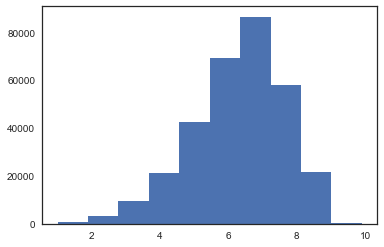

In [44]:
plt.hist(movie_df['Rating'])


Have you noticed that this function returns three objects? Take a look at the documentation [here](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist) to figure out what they are.

To get the returned three objects:

[   824.   3363.   9505.  21207.  42500.  69391.  86470.  58059.  21538.
    154.]
[ 1.    1.89  2.78  3.67  4.56  5.45  6.34  7.23  8.12  9.01  9.9 ]


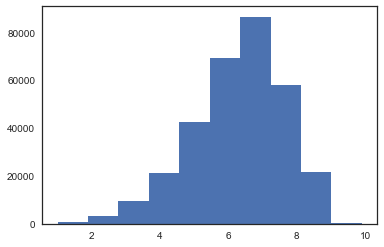

In [45]:
n_raw, bins_raw, patches = plt.hist(movie_df['Rating'])
print(n_raw)
print(bins_raw)

Actually, `n_raw` contains the values of histograms, i.e., the number of movies in each of the 10 bins. Thus, the sum of the elements in `n_raw` should be equal to the total number of movies:

In [46]:
# TODO: test whether the sum of the numbers in n_raw is equal to the number of movies. 
dfSize = int(len(movie_df))
hgSize = int(sum(n_raw))
if dfSize == hgSize:
    print("Both contain the same number: {}".format(dfSize))
else:
    print("The DataFrame has {} and the Histogram has {}".format(dfSize, hgSize))

Both contain the same number: 313011


The second returned object (`bins_raw`) is a list containing the edges of the 10 bins: the first bin is \[1.0,1.89\], the second \[1.89,2.78\], and so on.

Noticed that the width of each bin is the same? This is equal-width binning. We can calculate the width as:

In [47]:
min_rating = min(movie_df['Rating'])
max_rating = max(movie_df['Rating'])
print(min_rating, max_rating)
print( (max_rating-min_rating) / 10 )

1.0 9.9
0.89


Now, let's plot the histogram where the y axis is normed.

[ 0.00295786  0.01207195  0.03411949  0.07612541  0.15255952  0.24908842
  0.31039581  0.20841067  0.07731358  0.0005528 ]
[ 1.    1.89  2.78  3.67  4.56  5.45  6.34  7.23  8.12  9.01  9.9 ]


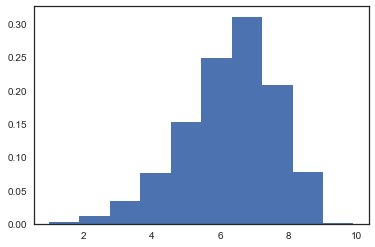

In [48]:
n, bins, patches = plt.hist(movie_df['Rating'], normed=True)
print(n)
print(bins)

In this case, the edges of the 10 bins do not change. But now `n` represents the heights of the bins. In other words, the sum of the area of each bar will equal to 1. Can you verify this?

Hint: the area of each bar is calculated as height * bin width. Because of the way computers store float numbers, you'll probably get something like 0.99999999999999978 instead of 1.

In [54]:
# TODO: verify that the sum of areas equals to 1.

# (1) calculate bin width (as shown above)
min_rating = min(movie_df['Rating'])
max_rating = max(movie_df['Rating'])
width = (max_rating-min_rating) / (len(bins) - 1)

# (2) now compute the area
area = sum([ x*width for x in n])
print("The sum of the area of all histogram bars is {}".format(area))

The sum of the area of all histogram bars is 0.9999999999999998


## Selecting binsize

A nice to way to explore this is using the "[small multiples](https://www.google.com/search?client=safari&rls=en&q=small+multiples&ie=UTF-8&oe=UTF-8)" with a set of sample bin sizes. In other words, pick some binsizes that you want to see and draw many plots within a single "figure". Read about [subplot](https://www.google.com/search?client=safari&rls=en&q=matplotlib+subplot&ie=UTF-8&oe=UTF-8). For instance, you can do something like:

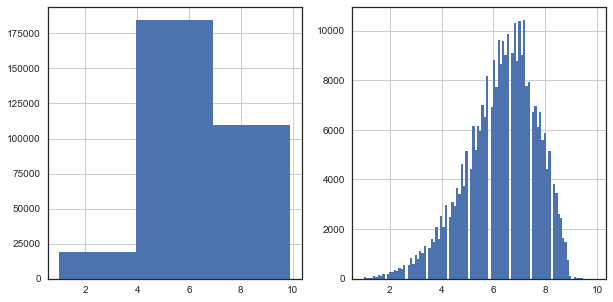

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
movie_df['Rating'].hist(bins=3)
plt.subplot(1,2,2)
movie_df['Rating'].hist(bins=100)

What does the argument in `plt.subplot(1,2,1)` mean?  
http://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

So we can create 8 subplots (2 rows and 4 columns) with the given `binsizes`. 

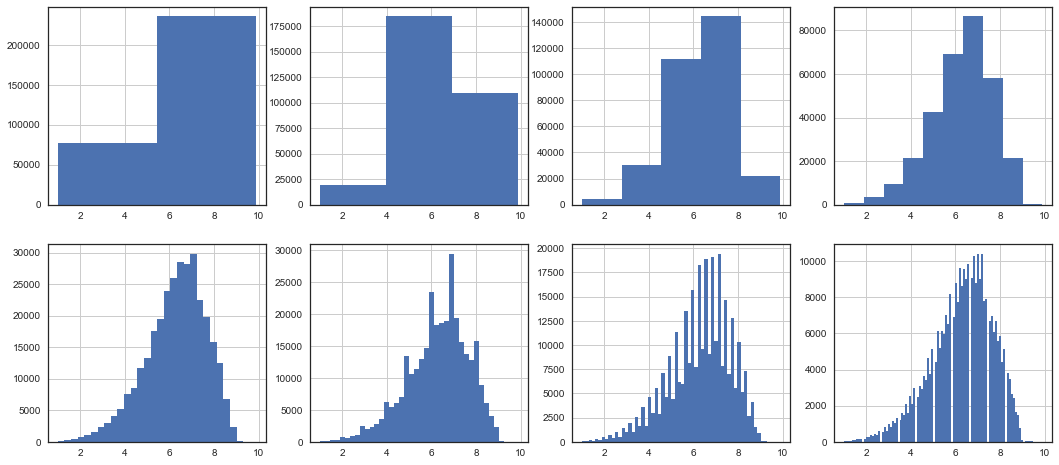

In [60]:
binsizes = [2, 3, 5, 10, 30, 40, 60, 100 ]

plt.figure(1, figsize=(18,8))
for i, bins in enumerate(binsizes):
    # TODO: use subplot and hist() function to draw 8 plots
    plt.subplot(2, 4, i+1)
    movie_df['Rating'].hist(bins=bins)

Do you notice weird patterns that emerge from `bins=40`? Can you guess why do you see such patterns? What are the peaks and what are the empty bars? What do they tell you about choosing the binsize in histograms?

In [ ]:
# TODO: Provide your explanation and evidence here

I explored these weird patterns of the histograms on the IMDB Rating data in Lab 5. In the cell below this one are my analysis and comments from that submission.

Note, I used the following code to explore the data. This will produce a tabular representation of the Rating value (from 0.0 to 9.9, by 0.1), a count of how many movies have that rating, and an accumulation of the count. The full print of this table is omitted. 

`
ratings = movie_df['Rating']
print("{}\t{}\t{}".format("value", "count", "accum"))
accum = 0
for i in range(10):
    for j in range(10):
        value = i + j/10
        count = len(ratings[ratings == value])
        accum += count
        print("{}\t{}\t{}".format(value, count, accum))
`

What this tells us about choosing bin size: (1) know your data and value patterns, or explore and analyze them so that you know; (2) bin size is sensitive to the data values, and can unknowingly show "weird" patterns; (3) be sure to visually inspect many histogram plots with different bin sizes and choose that which shows the distribution with desired granularity best.

**Comments on: plotting histogram of IMDB Rating data**

With bins=10 (the default value), we can see what is probably the expected distribution of Ratings; few in the lower end of the range (less than 4) and upper end of the range (greater than 8), and most in the middle (between 4 and 8).

with bins=5 the perspective really becomes general, and vague. 

With bins=20 the perspective improves with the greater granularity, but the histogram shows an unusual/unexpected dip between 6 and 7.

With bins=40 we see some strange spiking at approximately the whole number values: 3.0, 4.0, and so on up to 8.0.

With bins=100 there appear to be gaps at uniform distance, and not really at discernable values. 

Wondering what's going on with the numbers, I decided to count and accumulate the Rating values across the value spectrum: 0.0 - 9.9. Some interesting observations:

- there are spikes at the whole number values
- the values seem to see-saw across the tenth of a point boundaries (below, the values from 5.0 to 5.9)

`
value	count	accum
5.0		5135	55473   
5.1		4417	59890   
5.2		6150	66040   
5.3		5201	71241   
5.4		6158	77399
5.5		5962	83361
5.6		7001	90362
5.7		6514	96876
5.8		8159	105035
5.9		6918	111953
`

Now, let's try to apply several algorithms from class for finding the number of bins (called `nbins`). 

* Freedman-Diaconis: $\text{width} = 2 \frac{\text{IQR}}{N^{1/3}}$;
* Sqrt root: $\text{nbins} = \sqrt{N}$;
* Sturge's formula: $\text{nbins} = \lceil \log_2 N + 1 \rceil$

Here, IQR is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) of our data (movie ratings). $N$ is the number of movies. $\lceil \cdot \rceil$ is the [ceiling function](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions), and we can use [`np.ceil()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ceil.html) function to calculate it.

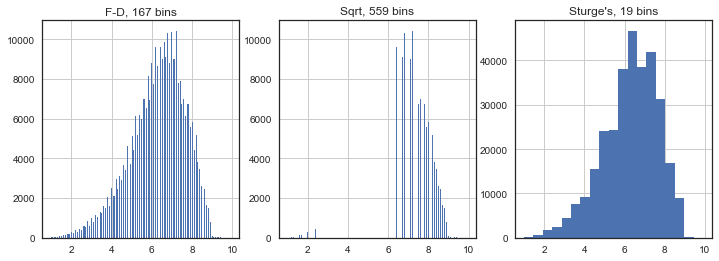

In [68]:
N = len(movie_df['Rating'])

# TODO: plot three histograms based on three formulae. One of them is provided as an example. 

plt.figure(figsize=(12,4))

# Freedman-Diaconis
data = movie_df['Rating'].sort_values()
iqr = np.percentile(data, 75) - np.percentile(data, 25)
width = 2*iqr/np.power(N, 1/3)
nbins = int((max(data) - min(data)) / width)

plt.subplot(1,3,1)
plt.title("F-D, {} bins".format(nbins))
movie_df['Rating'].hist(bins=nbins)

# Sqrt root
nbins = int(np.sqrt(N))
plt.subplot(1,3,2)
plt.title("Sqrt, {} bins".format(nbins))
movie_df['Rating'].hist(bins=nbins)

# Sturge's formula
nbins = int(np.ceil(np.log2(N+1)))
plt.subplot(1,3,3)
plt.title("Sturge's, {} bins".format(nbins))
movie_df['Rating'].hist(bins=nbins)

# Boxplot

Let's look at the example data that we looked at during the class. 

In [70]:
data = [-1, 3, 3, 4, 15, 16, 16, 17, 23, 24, 24, 25, 35, 36, 37, 46]

The [**`numpy.percentile()`**](http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html) function provides a way to calculate the percentiles. Note that using the option `interpolation`, you can specify which value to take when the percentile value lies in between numbers. The default is linear. 

In [72]:
print(np.percentile(data, 25))
print(np.percentile(data, 50), np.median(data))
print(np.percentile(data, 75))

12.25
20.0 20.0
27.5


Can you explain why do you get those first and third quartile values? The first quantile value is not 4, not 15, and not 9.5. Why?

# TODO: explain

The explanation resides in the `numpy.percentile()` documentation, specifically in the *Notes* sub-section. 

`
Given a vector V of length N, the q-th percentile of V is the value q/100 of the way from the mimumum to the maximum in in a sorted copy of V. The values and distances of the two nearest neighbors as well as the interpolation parameter will determine the percentile if the normalized ranking does not match the location of q exactly. This function is the same as the median if q=50, the same as the minimum if q=0 and the same as the maximum if q=100.
`

What this is saying is: `numpy.percentile()` will "seek" q/100 of the way through a sorted version of the data array, where q is the requested percentile value. The `interpolation` parameter has the following documentation:


`interpolation : {linear, lower, higher, midpoint, nearest}`  
This optional parameter specifies the interpolation method to use when the desired quantile lies between two data points i < j:
- linear: i + (j - i) * fraction, where fraction is the fractional part of the index surrounded by i and j.
- lower: i.
- higher: j.
- nearest: i or j, whichever is nearest.
- midpoint: (i + j) / 2.

In the case of the 25th percentile of our data[], the value is calculated as follows:

`
i = 4
j = 15
fraction = 0.75
`

and so the percentile computed by `i + (j - i) * fraction` equals 12.25.


Let's draw a boxplot with matplotlib. 

{'boxes': [<matplotlib.lines.Line2D at 0x11dce1d68>],
 'caps': [<matplotlib.lines.Line2D at 0x11dcec860>,
 'fliers': [<matplotlib.lines.Line2D at 0x11dcf0b00>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11dcf02b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11dce1fd0>,
  <matplotlib.lines.Line2D at 0x11dce7fd0>]}

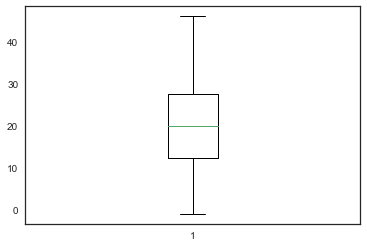

In [77]:
# TODO: draw a boxplot of the data
plt.boxplot(data)